### OpenAI Gym. LunarLander-v2 environment

Landing pad is always at coordinates (0,0). Coordinates are the first two numbers in state vector. 
Reward for moving from the top of the screen to landing pad and zero speed is about 100..140 points.
If lander moves away from landing pad it loses reward back. 
Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points. 
Each leg ground contact is +10. Firing main engine is -0.3 points each frame. Solved is 200 points. 
Landing outside landing pad is possible. 
Fuel is infinite, so an agent can learn to fly and then land on its first attempt. 
Four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

**Problem:**  
To guide the lander to the center of the landing pad and zero speed, maintaining correct orientation (both legs pointing down)  

**State vector (s):**  
* s[0] - x coordinate  
* s[1] - y coordinate  
* s[2] - x speed  
* s[3] - y speed  
* s[4] - angle  
* s[5] - angular speed  
* s[6] - if first leg has contact  
* s[7] - if second leg has contact  


**Possible actions:**   
- 0 - Do nothing  
- 1 - Fire left engine  
- 2 - Fire main engine  
- 3 - Fire right engine  

**Rewards:**
*   +100..140 for landing on the pad
*   +100 for successful landing
*   +10 for each led ground contact
*   -100 for crashing into the ground
*   -0.3 for each firing of the main engine

---

### Keyboard control

In [2]:
! python lunar_lander_keyboard.py

ACTIONS=4
Press keys 1 2 3 ... to take actions 1 2 3 ...
No keys pressed is taking action 0
reward -1.451
reward -1.539
reward -1.510
reward -1.480
reward -1.446
reward -1.409
reward -1.371
reward -1.329
reward -1.286
reward -1.242
reward -1.196
reward -1.149
reward -1.101
reward -1.051
reward -1.001
reward -0.951
reward -0.899
reward -0.848
reward -0.795
reward -0.743
reward -0.689
reward -0.636
reward -0.582
reward -0.529
reward -0.562
reward 0.082
reward 0.297
reward 0.087
reward 5.397
reward -0.449
reward 6.031
reward 0.411
reward 0.521
reward -0.262
reward 0.583
reward 0.041
reward -0.145
reward 0.490
reward -0.000
reward 0.776
reward 2.697
reward 2.745
reward 3.852
reward 5.857
reward 3.793
reward 3.904
reward 5.457
reward 4.387
reward 5.325
reward 5.315
reward 2.739
reward 2.908
reward 2.814
reward 2.784
reward 4.277
reward 2.890
reward 1.608
reward 1.722
reward 0.319
reward 2.740
reward 1.647
reward 11.829
reward 12.567
reward -100.000
timesteps 64 reward -18.76
reward 0.892
re

---

### Heuristic solution (fuzzy controller)

In [3]:
!python lunar_lander_heuristic.py

observations: +0.01 +1.42 +0.73 +0.23 -0.02 -0.13 +0.00 +0.00
step 0 total_reward +0.39
observations: +0.15 +1.40 +0.65 -0.30 +0.10 +0.17 +0.00 +0.00
step 20 total_reward -2.49
observations: +0.28 +1.14 +0.67 -0.84 +0.25 +0.10 +0.00 +0.00
step 40 total_reward -28.45
observations: +0.39 +0.74 +0.33 -0.83 +0.32 +0.01 +0.00 +0.00
step 60 total_reward +11.00
observations: +0.41 +0.43 -0.14 -0.55 +0.32 -0.04 +0.00 +0.00
step 80 total_reward +61.89
observations: +0.35 +0.24 -0.44 -0.28 +0.23 -0.15 +0.00 +0.00
step 100 total_reward +86.95
observations: +0.24 +0.17 -0.59 -0.12 +0.01 -0.26 +0.00 +0.00
step 120 total_reward +109.98
observations: +0.12 +0.11 -0.56 -0.15 -0.17 -0.15 +0.00 +0.00
step 140 total_reward +106.14
observations: +0.03 +0.04 -0.36 -0.16 -0.28 -0.07 +0.00 +0.00
step 160 total_reward +121.98
observations: -0.02 -0.01 -0.20 -0.00 +0.06 +0.01 +1.00 +1.00
step 180 total_reward +183.76
observations: -0.05 -0.00 -0.08 +0.00 +0.00 -0.00 +1.00 +1.00
step 200 total_reward +197.88
ob

---

### Q-table solution

$\epsilon$-greedy policy  

TD(0) update:  
![q-value equation](images/math.svg)

**Hyperparameters:**  
*   $\alpha$ (alpha) is the learning rate (0<$\Large \alpha$<=1) 
*   $\gamma$ (gamma) is the discount factor ($0 \leq \gamma \leq 1$) - determines how much importance we want to give to future rewards. A high value for the discount factor (close to 1) captures the long-term effective award, whereas, a discount factor of 0 makes our agent consider only immediate reward, hence making it greedy.
*   $\epsilon$ (epsilon) is the probability of random action. In our case we start from full exploration (epsilon=1.0) and decrease the value to epsilon_min (=0.01) as episodes pass.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 9]
from lunar_lander_qtable_td import QTable, create_env
env = create_env()

In [6]:
# Train the agent on N episodes
agent = QTable(env, alpha=0.1, gamma=.99, epsilon=1.0, epsilon_min=.01, epsilon_max=1.0, epsilon_decay=0.996)

In [9]:
loss = agent.train(20000)

[0/1000] Average over last 100 episodes: -118.10
epsilon=1.0000
[500/1000] Average over last 100 episodes: -70.74
epsilon=0.3002


### Final reward

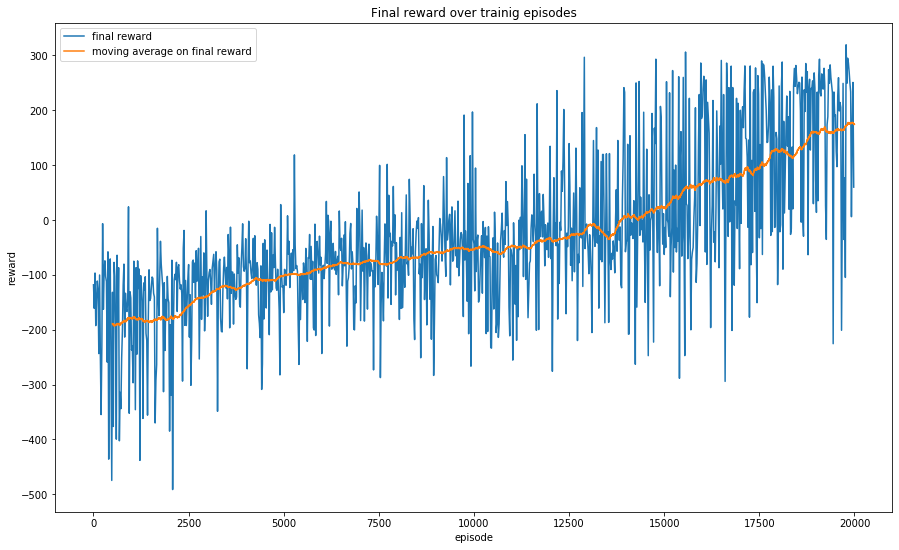

In [7]:
reward = np.load(r'qtbl_td_reward_20000.npy')
window = 500
freq = 20
avg_reward = pd.DataFrame(reward).rolling(window).mean()
plt.plot(np.arange(1, len(reward)+1, freq), reward[::freq], label='final reward')
plt.plot(avg_reward, label='moving average on final reward')
plt.xlabel('episode')
plt.ylabel('reward')
plt.title('Final reward over trainig episodes')
plt.legend()
plt.show();

### Q-table visualization

In [62]:
# Load q-tables of agents with different performance
agent_1k = QTable(env)
# agent_1k.load_qtable(r'checkpoints\qtbl_td_e1000.npy')
agent_1k.load_qtable(r'checkpoints\qtbl_td_e1000.npy')
agent_20k = QTable(env)
# agent_20k.load_qtable(r'checkpoints\qtbl_td_e20000.npy')
agent_20k.load_qtable(r'checkpoints\qtbl_td_e20000.npy')
qtbl_1k = agent_1k.qtbl_2d
qtbl_20k = agent_20k.qtbl_2d

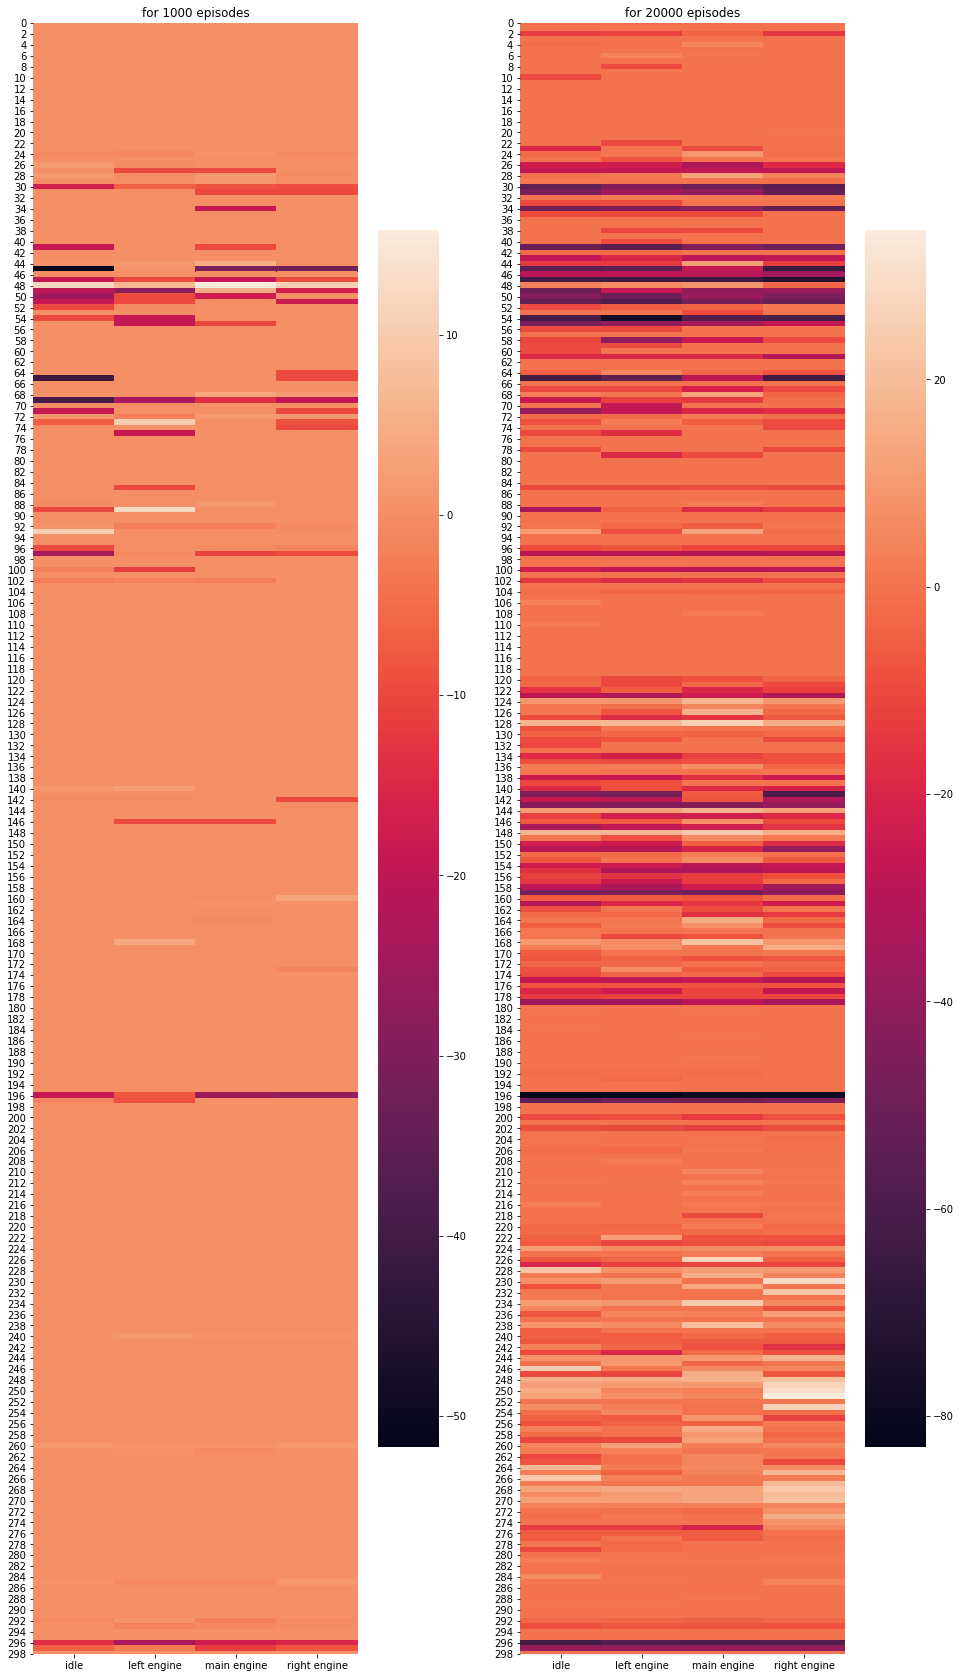

In [63]:
fig, ax = plt.subplots(1,2, figsize=(16,30)) 
actions = ['idle', 'left engine', 'main engine', 'right engine']
start_idx = 18000
n_samples = 300
ax[0].set_title('for 1000 episodes')
ax[1].set_title('for 20000 episodes')
x_1k = sns.heatmap(qtbl_1k[start_idx:start_idx+n_samples], xticklabels=actions, ax=ax[0])
x_20k = sns.heatmap(qtbl_20k[start_idx:start_idx+n_samples], xticklabels=actions, ax=ax[1])

### Epsilon decay function

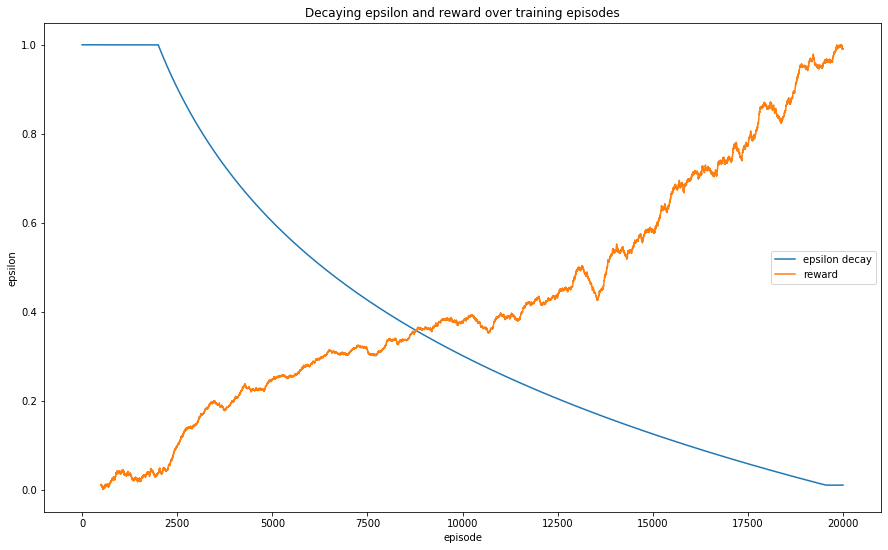

In [8]:
total_episodes = 20000
episodes = np.arange(total_episodes)
# epsilon = np.clip(1.0 - np.log10((episodes + 1) / (total_episodes * 0.1)), 0.1, 1.0)
epsilon = agent.decay_function(episodes, total_episodes)
plt.rcParams['figure.figsize'] = [15, 9]
plt.plot(episodes, epsilon, label='epsilon decay')
plt.plot(episodes, (avg_reward - np.min(avg_reward)) / (np.max(avg_reward) - np.min(avg_reward)), label='reward')
plt.xlabel('episode')
plt.ylabel('epsilon')
plt.legend()
plt.title('Decaying epsilon and reward over training episodes')
plt.show();

---

### Agent performance at the beginning (1000 episodes)
<!-- ![before_training](images/training/before_training.gif) -->

In [9]:
!python evaluate_qtable_td.py -c "checkpoints\qtbl_td_e1000.npy" -e 2 --render

episode: 0/2, score: -241.20748898070224
episode: 1/2, score: -93.8910617871554
avg_score: -167.54927538392883; score_std: 73.65821359677342


### Agent performance after 5000 episodes
<!-- ![mid_training](images/training/mid_training.gif) -->

In [10]:
!python evaluate_qtable_td.py -c "checkpoints\qtbl_td_e5000.npy" -e 2 --render

episode: 0/2, score: -79.36419236279235
episode: 1/2, score: -70.99336362005629
avg_score: -75.17877799142431; score_std: 4.185414371368033


### Agent performance after 20000 episodes
<!-- ![after_training](images/training/after_training.gif) -->

In [11]:
!python evaluate_qtable_td.py -c "checkpoints\qtbl_td_e20000.npy" -e 5 --render

episode: 0/5, score: -21.538578346022334
episode: 1/5, score: 129.43750041114728
episode: 2/5, score: 145.331931247818
episode: 3/5, score: 238.74525048112318
episode: 4/5, score: 260.18021540507584
avg_score: 150.4312638398284; score_std: 99.8844938149657


---